In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Create a path to main folder
path = r'C:\Users\reece\InstaCart Basket Analysis 4.4.23'
# Import dataset
df_part1 = pd.read_pickle(os.path.join(path, 'Data', 'Prepared Data', 'wrangled_cust_merged.pkl'))

In [4]:
df_part1[:200000]
df_part1.head()

,Product_Name,Prices,user_id,days_since_prior_order,busiest_period_of_day,loyalty_flag,spending_flag,order_freq_flag,Gender,STATE,Age,date_joined,n_dependants,fam_status,income
0,Chocolate Sandwich Cookies,5.8,138,3.0,Most orders,Regular customer,Low spender,Frequent customer,Male,Minnesota,81,8/1/2019,1,married,49620
1,Chocolate Sandwich Cookies,5.8,138,20.0,Average orders,Regular customer,Low spender,Frequent customer,Male,Minnesota,81,8/1/2019,1,married,49620
2,Chocolate Sandwich Cookies,5.8,709,6.0,Average orders,New customer,Low spender,Frequent customer,Female,Vermont,66,6/16/2018,2,married,158302
3,Chocolate Sandwich Cookies,5.8,764,9.0,Average orders,New customer,Low spender,Frequent customer,Female,Wisconsin,40,2/9/2020,3,married,31308
4,Chocolate Sandwich Cookies,5.8,777,26.0,Average orders,Regular customer,Low spender,Regular customer,Female,Hawaii,51,1/4/2019,2,married,57797


In [6]:
df_part1['spending_flag'].unique()

array(['Low spender', 'High spender'], dtype=object)

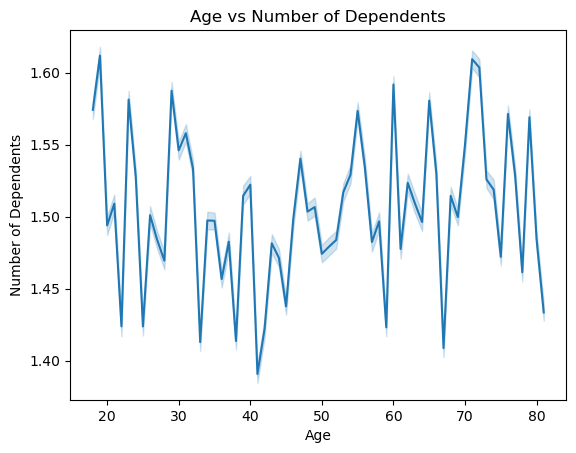

In [48]:
sns.lineplot(data=df_part1, x='Age', y='n_dependants')
plt.xlabel('Age')
plt.ylabel('Number of Dependents')
plt.title('Age vs Number of Dependents')
plt.savefig('Age vs Number of Dependents.png')
plt.show()

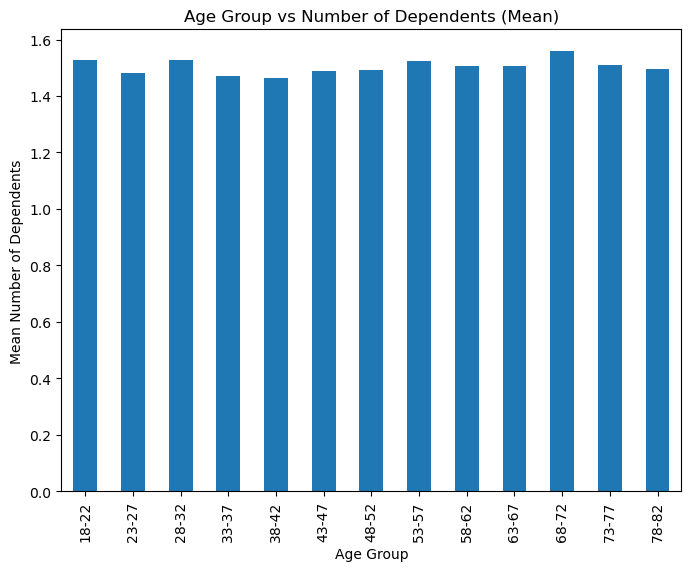

In [47]:
# Create bins for age groups with 5-year intervals
age_bins = range(df_part1['Age'].min(), df_part1['Age'].max()+6, 5)
age_labels = [f'{x}-{x+4}' for x in age_bins[:-1]]
df_part1['AgeGroup'] = pd.cut(df_part1['Age'], bins=age_bins, labels=age_labels)

# Group the dataframe by 'AgeGroup' and calculate the mean of 'n_dependants' for each age group
age_dependants_mean = df_part1.groupby('AgeGroup')['n_dependants'].mean()

# Create a bar chart using the grouped data
bar = age_dependants_mean.plot.bar(figsize=(8, 6))
plt.title('Age Group vs Number of Dependents (Mean)')
plt.xlabel('Age Group')
plt.ylabel('Mean Number of Dependents')
plt.savefig('Age Group vs Number of Dependents.png')
plt.show()

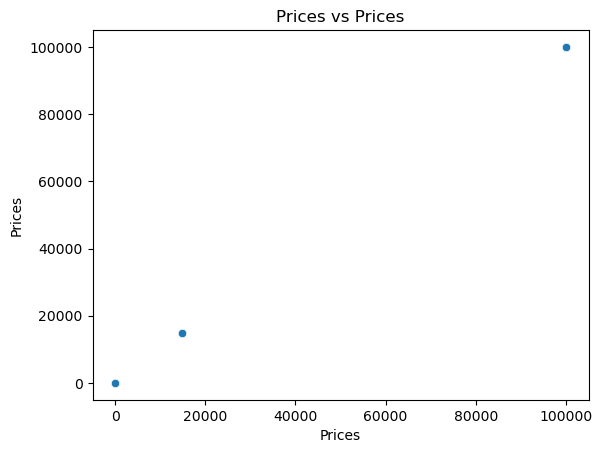

In [46]:
scatter = sns.scatterplot(x='Prices', y='Prices', data=df_part1)
plt.title('Prices vs Prices')
plt.xlabel('Prices')
plt.ylabel('Prices')
plt.savefig('Prices.png')
plt.show()

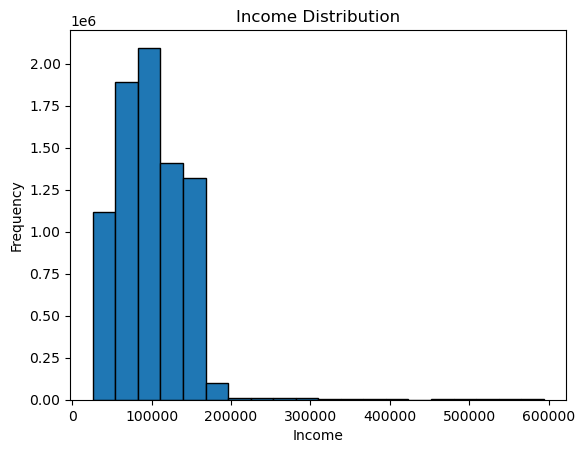

In [45]:
# Create a histogram of income
plt.hist(df_part1['income'], bins=20, edgecolor='black')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.title('Income Distribution')
plt.savefig('Income Distribution.png')
plt.show()

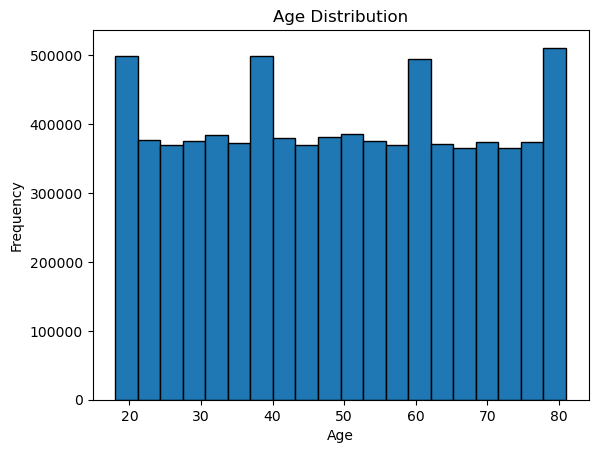

In [44]:
# Create a histogram of age
plt.hist(df_part1['Age'], bins=20, edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution')
plt.savefig('age_distribution')
plt.show()

In [28]:
df_ords_prods_merged = pd.read_pickle(os.path.join(path, 'Data', 'Prepared Data', 'orders_products_merged_aggregated.pkl'))

In [29]:
df_ords_prods_merged.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,...,add_to_cart_order,reordered,_merge,busiest_period_of_day,max_order,loyalty_flag,avg_price,spending_flag,order_freq_flag,median_freq
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,11,...,5,0,both,Most orders,32,Regular customer,6.935811,Low spender,Frequent customer,8.0
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,30,6,17,...,1,1,both,Average orders,32,Regular customer,6.935811,Low spender,Frequent customer,8.0
2,1,Chocolate Sandwich Cookies,61,19,5.8,389851,709,2,0,21,...,20,0,both,Average orders,5,New customer,7.930208,Low spender,Frequent customer,8.0
3,1,Chocolate Sandwich Cookies,61,19,5.8,652770,764,1,3,13,...,10,0,both,Most orders,3,New customer,4.972414,Low spender,Frequent customer,9.0
4,1,Chocolate Sandwich Cookies,61,19,5.8,1813452,764,3,4,17,...,11,1,both,Average orders,3,New customer,4.972414,Low spender,Frequent customer,9.0


You need to provide the Instacart senior stakeholders with descriptive findings about sales. Create a histogram of the “order_hour_of_day” column.
In a markdown cell beneath your histogram, describe what the histogram demonstrates.


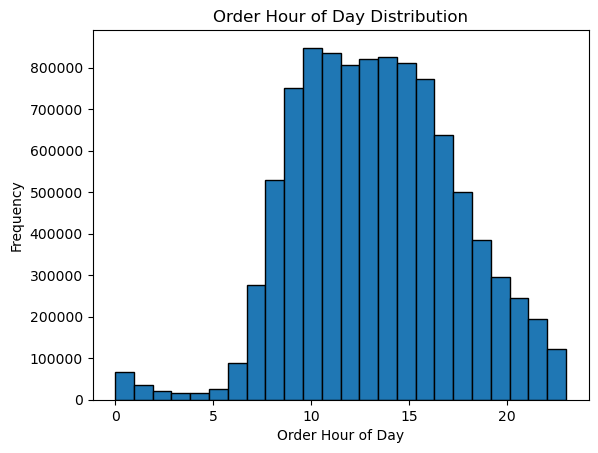

In [43]:
# Create the histogram
plt.hist(df_ords_prods_merged['order_hour_of_day'], bins=24, edgecolor='black')

# Add labels and title
plt.xlabel('Order Hour of Day')
plt.ylabel('Frequency')
plt.title('Order Hour of Day Distribution')

# Save the histogram as a .png file
plt.savefig('order_hour_of_day_histogram.png')

# Display the histogram
plt.show()

The marketing team is curious about the distribution of orders among customers in terms of loyalty. Create a bar chart from the “loyalty_flag” column.

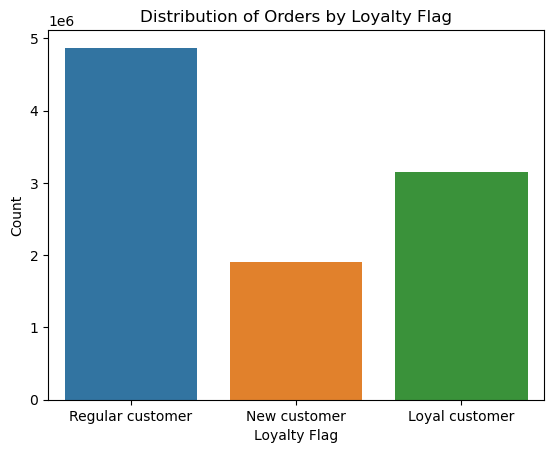

In [40]:
# Create the bar chart
sns.countplot(data=df_ords_prods_merged, x='loyalty_flag')
plt.xlabel('Loyalty Flag')
plt.ylabel('Count')
plt.title('Distribution of Orders by Loyalty Flag')

# Save the bar chart as a .png file
plt.savefig('orders_by_loyalty_flag.png')

# Display the bar chart
plt.show()

Check whether there’s a difference in expenditure (the “prices” column) depending on the hour of the day. (Hint: To check this, you need to use an accurate sample for your line chart!)

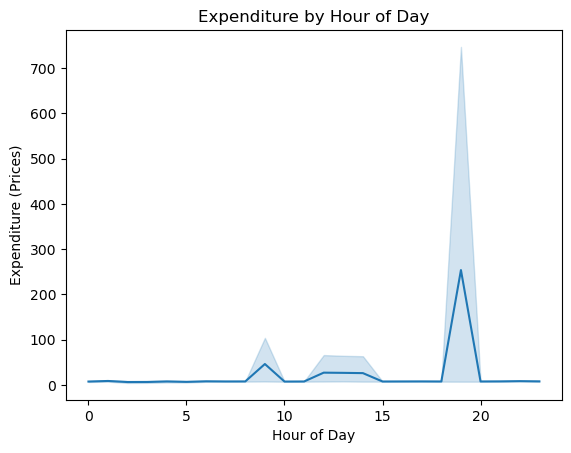

In [39]:
sns.lineplot(data=df_sample, x='order_hour_of_day', y='prices')
plt.xlabel('Hour of Day')
plt.ylabel('Expenditure (Prices)')
plt.title('Expenditure by Hour of Day')

# Save the line chart as a .png file
plt.savefig('expenditure_by_hour.png')

# Display the line chart
plt.show()

Now that you have information about customers, you need to conduct some exploratory analysis of customer demographics to inform the targeted marketing campaigns. First, determine whether there’s a connection between age and family situation by creating a line chart exploring the connections between age and number of dependents:
In a markdown cell beneath your line chart, describe what the line chart shows.


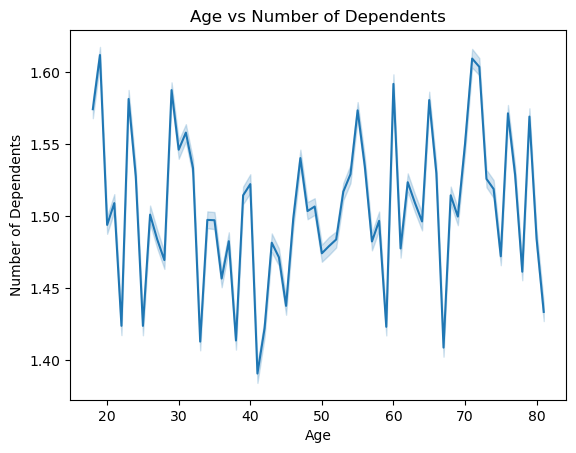

In [38]:
# Create the line chart
sns.lineplot(data=df_part1, x='Age', y='n_dependants')
plt.xlabel('Age')
plt.ylabel('Number of Dependents')
plt.title('Age vs Number of Dependents')

# Save the line chart as a .png file
plt.savefig('age_vs_dependents.png')

# Display the line chart
plt.show()

You’ll also need to explore whether there’s a connection between age and spending power (income). To visualize this relationship, create a scatterplot using the sns.scatterplot() function.
In a markdown cell beneath your scatterplot, describe what the scatterplot shows.


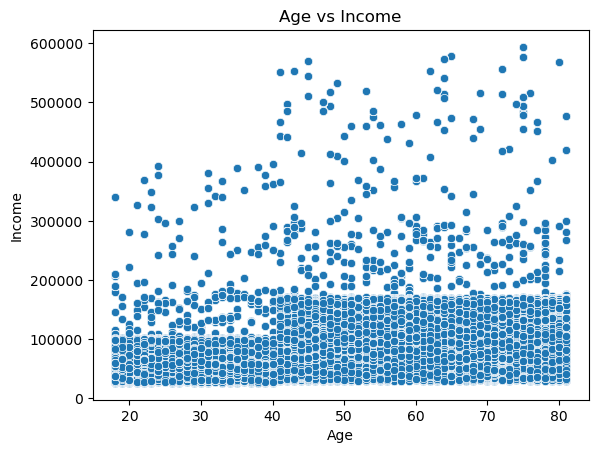

In [37]:
# Create a scatterplot of age vs. income
sns.scatterplot(x='Age', y='income', data=df_part1)
plt.xlabel('Age')
plt.ylabel('Income')
plt.title('Age vs Income')
plt.savefig('age_vs_income.png') # Save the scatterplot as a .png file
plt.show() # Display the scatterplot